In [1]:
# import libraries 
import pandas as pd

In [2]:
#show all rows in pandas dataframe
pd.set_option('display.max_rows', None)

In [3]:
# load dataset
data = pd.read_csv("arrhythmia.csv", na_values="?")
print(data.shape)
data.head()

(452, 280)


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


# Exploratory Data Analysis

In [4]:
# data types
data.dtypes.value_counts()

int64      155
float64    125
dtype: int64

In [5]:
# Let's remove the columns with only one unique values (columns with zero variance)
data = data.loc[:, ~data.apply(lambda x: x.nunique() == 1)]

We do not really know which variables are continuos or categorical, so let's create simple heuristic, columns with less than 15 unique values will be converted to categorical variables  

In [6]:
# define categorical and numerical variables
cat_variables = data.loc[:, data.apply(lambda x: x.nunique() < 15)].columns.tolist()
num_variables = data.loc[:, data.apply(lambda x: x.nunique() >= 15)].columns.tolist()

In [7]:
# let's change the dtype of variables less than 20 unique values to categorical
data = data.astype({k:"category" for k in cat_variables})

### Null values

In [8]:
# find columns with null values
data.loc[:, data.apply(lambda x: x.isnull().any(), axis=0)].isnull().mean()*100

T             1.769912
P             4.867257
QRST          0.221239
J            83.185841
heartrate     0.221239
dtype: float64

In [9]:
# drop variables with null variables greater than 20%
data = data.loc[:, data.apply(lambda x:x.isnull().mean() < 0.2 )]
num_variables.remove("J")

## Univariant Analysis of Numerical Variables

**Variables that follow a normal distribution:** \
['age',
 'QRST',
 'chDIII_Rwave',
 'chDI_QRSTA',
 'chDII_QRSA',
 'chDII_QRSTA',
 'chDIII_QRSA',
 'chDIII_QRSTA',
 'chAVR_QRSTA',
 'chAVL_QRSTA',
 'chAVF_QRSA',
 'chAVF_QRSTA',
 'chV3_QRSTA',
 'chV4_RwaveAmp',
 'chV4_QRSTA',
 'chV5_RwaveAmp',
 'chV5_QRSA',
 'chV5_QRSTA',
 'chV6_RwaveAmp',
 'chV6_QRSTA']


**Outliers** \
In general there are plenty of outliers that can be corrected before training

In [10]:
# import libraries
from mlutilities.eda import kolmogorov_test_widget
from mlutilities.eda import kolmogorov_test

In [11]:
# Test normality using kolmogorov test
kolmogorov_test_widget(data)

Output()

In [12]:
# Variables that follows a normal distribution
ktest_results = {var:kolmogorov_test(data, var, return_test=True) for var in num_variables}
ktest_results = pd.Series({k:v[-1] for k , v in ktest_results.items()})

------------------------- Kolmogorov test fot the variable age --------------------
statistic=0.038, p_value=0.532

Since 0.532 > 0.05 you cannot reject the null hypothesis, so the variable age 
follows a normal distribution
-------------------------------------------------------------------------------------------

------------------------- Kolmogorov test fot the variable height --------------------
statistic=0.329, p_value=0.000

Since 0.000 < 0.05 you can reject the null hypothesis, so the variable height 
do not follow a normal distribution
-------------------------------------------------------------------------------------------

------------------------- Kolmogorov test fot the variable weight --------------------
statistic=0.067, p_value=0.032

Since 0.032 < 0.05 you can reject the null hypothesis, so the variable weight 
do not follow a normal distribution
-------------------------------------------------------------------------------------------

------------------------- Ko

In [13]:
# Variables that follows a normal distribution
ktest_results[ktest_results == 'Normal distribution'].index.tolist()

['age',
 'QRST',
 'chDIII_Rwave',
 'chDI_QRSTA',
 'chDII_QRSA',
 'chDII_QRSTA',
 'chDIII_QRSA',
 'chDIII_QRSTA',
 'chAVR_QRSTA',
 'chAVL_QRSTA',
 'chAVF_QRSA',
 'chAVF_QRSTA',
 'chV3_QRSTA',
 'chV4_RwaveAmp',
 'chV4_QRSTA',
 'chV5_RwaveAmp',
 'chV5_QRSA',
 'chV5_QRSTA',
 'chV6_RwaveAmp',
 'chV6_QRSTA']

### Univariant Analysis of Categorical Variables

In [14]:
# import countplot widget
from mlutilities.eda import countplot_widget

In [15]:
# visualize categorical variables
countplot_widget(data)

Output()

### Multivariant Analysis

In [16]:
from mlutilities.eda import cramersv_heatmap

In [17]:
# Correlation between numerical variablesa

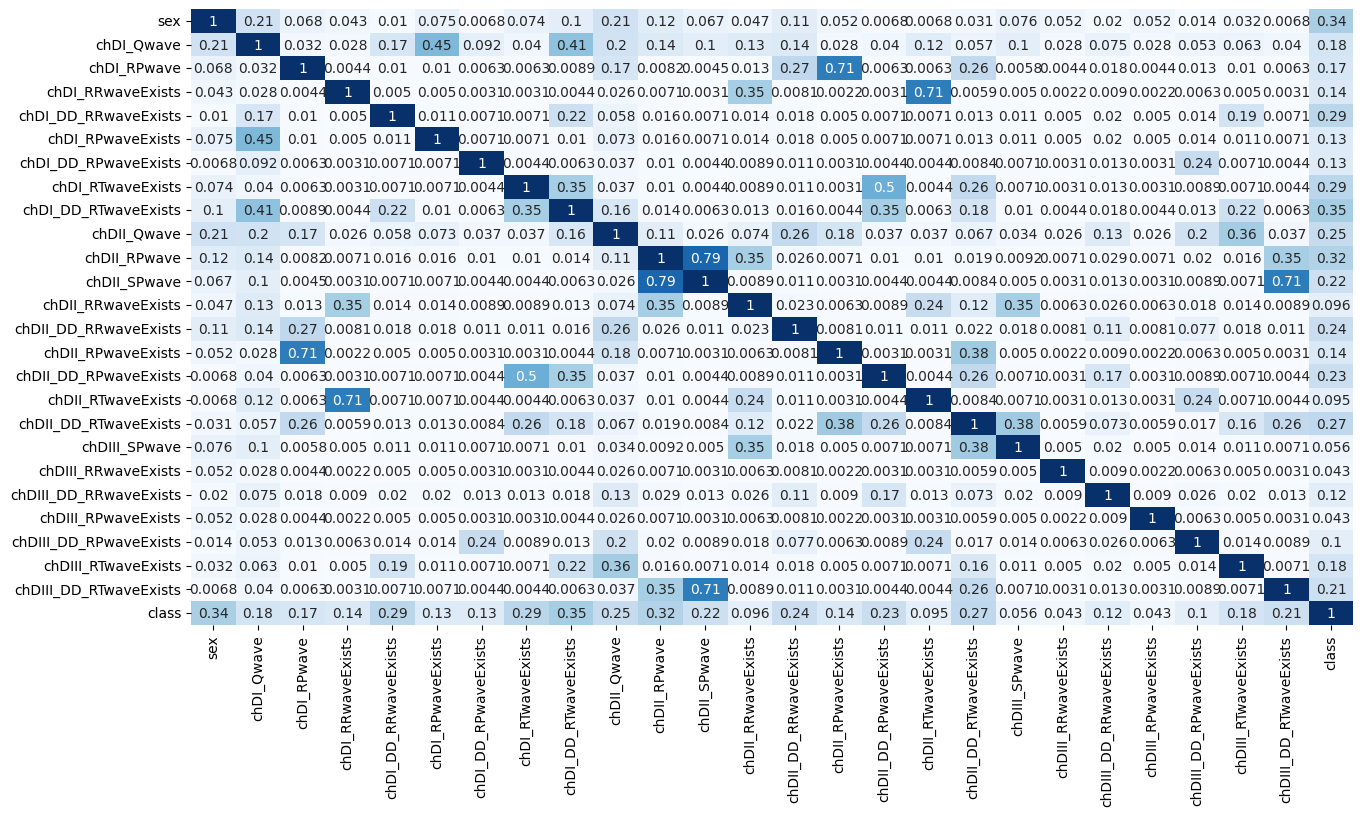

In [27]:
# correlation between categorical variables
cramersv_heatmap(data[cat_variables[:25] + ['class']])

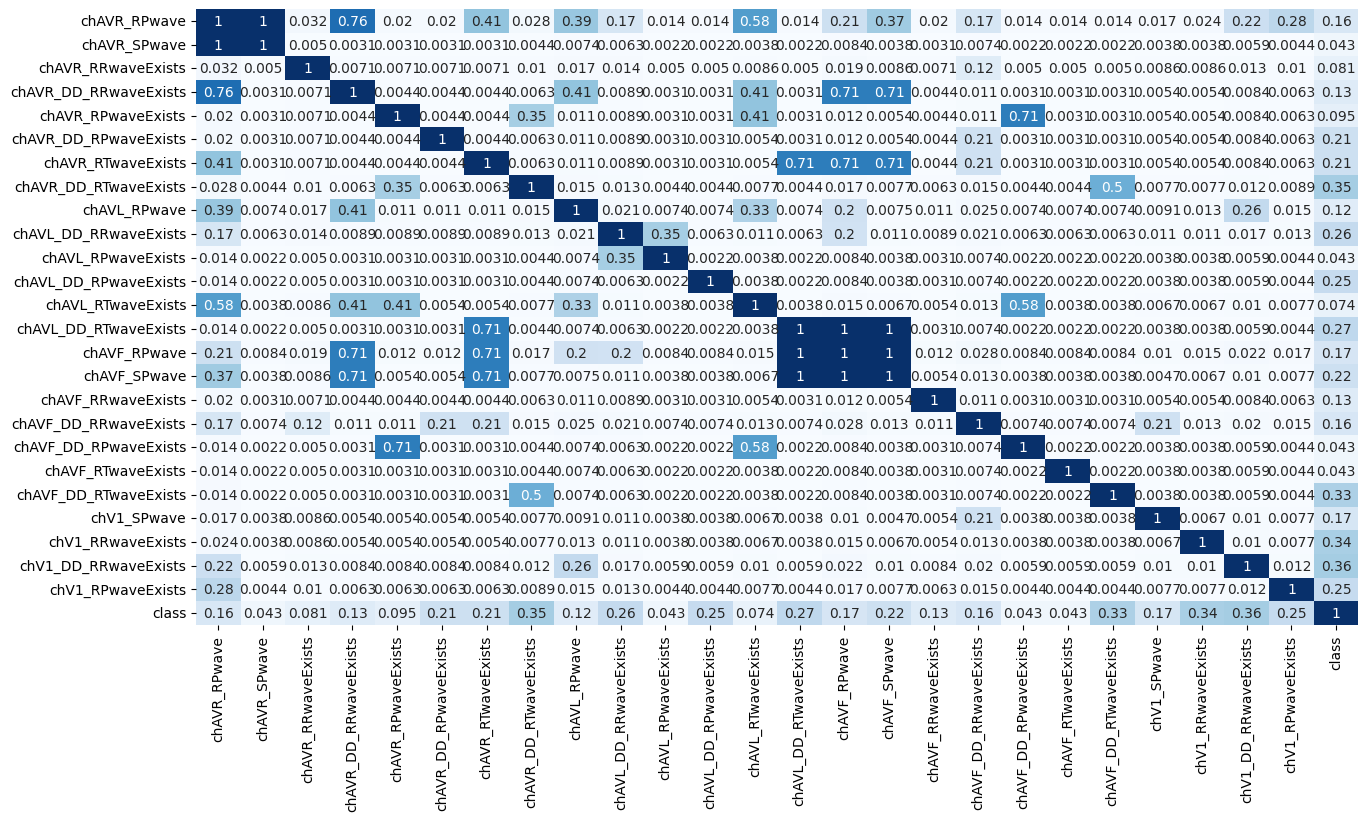

In [28]:
# correlation between categorical variables
cramersv_heatmap(data[cat_variables[25:50] + ['class']])

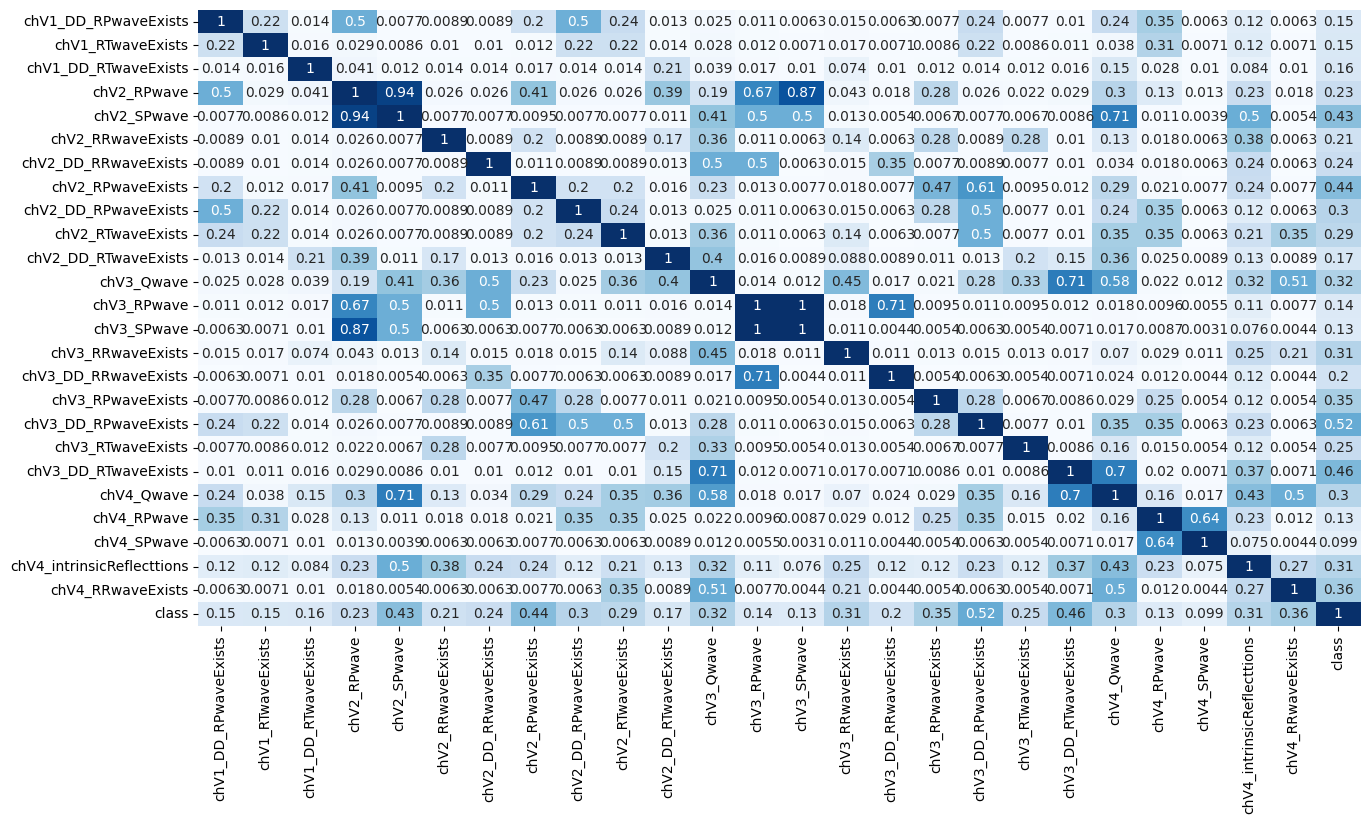

In [29]:
# correlation between categorical variables
cramersv_heatmap(data[cat_variables[50:75] + ['class']])

In [19]:
#we can use de kurskal-wallas test to 